# BIA-652 Assignment 1. Intro to Pandas

Note: Please **DO NOT** share your answers with anyone, including uploading to Github, Course Hero, etc. 

### Your Name:  Priyanka Shewale

In [ ]:
import numpy as np #numerical computation
import pandas as pd #processing dataframes

Use the `RegularSeasonCompactResults` data to answer the following questions:  

In [ ]:
# Download example data set
import urllib.request
from zipfile import ZipFile

urllib.request.urlretrieve("http://fengmai.net/download/data/bia652/pandas_data.zip", 
                           "pandas_data.zip")
ZipFile("pandas_data.zip").extractall()
df = pd.read_csv('data/RegularSeasonCompactResults.csv')

__Q1: Create a new column `total_score` as the sum of Wscore and Lscore.__ 

In [ ]:
df['total_score'] = df['Wscore'].add(df['Lscore'])
df.head()


,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,total_score
0,1985,20,1228,81,1328,64,N,0,145
1,1985,25,1106,77,1354,70,H,0,147
2,1985,25,1112,63,1223,56,H,0,119
3,1985,25,1165,70,1432,54,H,0,124
4,1985,25,1192,86,1447,74,H,0,160


__Q2: What is the min, max, average, and median of the total_score?__ 

In [ ]:
#df['total_score'].max()
#df['total_score'].min()
df['total_score'].describe()

count    145289.000000
mean        141.097330
std          21.601779
min          62.000000
25%         126.000000
50%         140.000000
75%         155.000000
max         331.000000
Name: total_score, dtype: float64

In [ ]:
df['total_score'].median()

140.0

__Q3: Find the average total score for each year (season).__ 

In [ ]:
df.groupby(['Season'])['total_score'].mean().head()

Season
1985    138.583356
1986    138.447528
1987    144.764496
1988    147.470796
1989    151.259351
Name: total_score, dtype: float64

In [ ]:
df['Season'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

__Q4: Plot a time series plot of average total score by year (season)__ 

Hint: search Google for: how to plot a pandas series or [read the user guide](https://pandas.pydata.org/docs/user_guide/visualization.html)


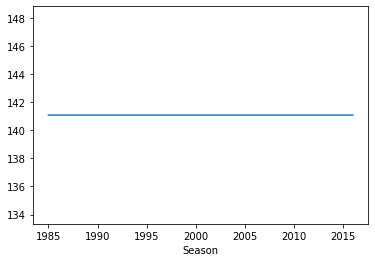

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

df['Avg_total_score'] = df['total_score'].mean()
df.head()
s= pd.Series(df['Avg_total_score'],df['Season'])
s.plot()


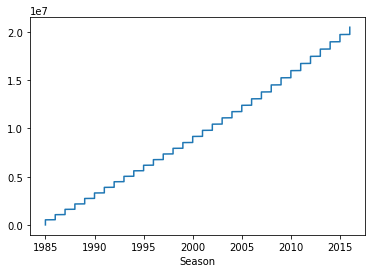

In [ ]:
s= pd.Series(df['Avg_total_score'],df['Season'])
s = s.cumsum()
s.plot()

__Q5: Which year has the highest percentage of blowout games, which is defined as a winning margin of at least 30 points?__ 



In [ ]:
df['blowout_margin_30'] = df['Wscore'].sub(df['Lscore'])
def mar(x):
    return 100*sum(x >= 30)/len(x)
df.groupby('Season').blowout_margin_30.agg(mar)

Season
1985    4.442066
1986    4.943167
1987    4.725415
1988    6.118837
1989    6.440426
1990    5.562423
1991    7.057967
1992    6.760359
1993    5.650427
1994    6.231527
1995    6.916851
1996    5.870936
1997    6.353791
1998    6.479482
1999    6.797726
2000    6.173932
2001    5.439893
2002    5.993414
2003    5.155979
2004    5.272369
2005    5.625668
2006    5.234391
2007    5.849693
2008    6.062367
2009    5.334349
2010    5.757173
2011    5.451773
2012    5.558728
2013    5.300752
2014    4.811637
2015    4.650728
2016    5.736636
Name: blowout_margin_30, dtype: float64

**Q6: For each team and season combination,   
a) find the average number of points scored by the team per game in each season;  
b) plot the average points scored by team 1461 by year.**

Hint: This requires you to consider both the case when the team won (Wscore) and when the team lost (Lscore).  
Your answer for each team-year combination should be between Wscore_when_winning and Lscore_when_losing in the last dataframe of the tutorial. 

In [ ]:
df.groupby(['Season'])[['Wteam', 'Lteam']].mean().head()


,Wteam,Lteam
Season,,
1985,1287.701097,1281.085898
1986,1285.545863,1282.876024
1987,1284.852107,1283.150192
1988,1284.863970,1284.150695
1989,1283.772851,1285.397325


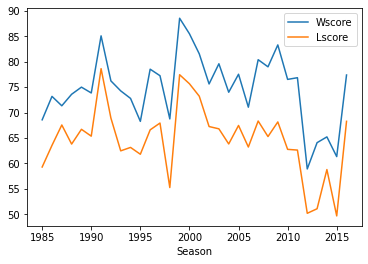

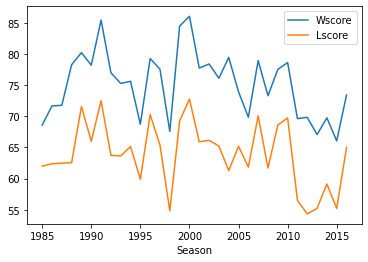

In [ ]:
losing_summary = df.groupby(['Lteam', 'Season'])[['Wscore', 'Lscore']].mean().loc[pd.IndexSlice[1461]].plot()
winning_summary = df.groupby(['Wteam', 'Season'])[['Wscore', 'Lscore']].mean().loc[pd.IndexSlice[1461]].plot()
